In [ ]:
import pymc3
import requests
import zipfile
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_file = "corona.csv"
data = pd.read_csv(data_file)
data.columns=["y", "x"]
data.head()

,y,x
0,449,6338
1,533,6529
2,500,6634
3,372,6646
4,311,6049


In [ ]:
#最尤推定
import statsmodels.formula.api as smf

result = smf.poisson('y ~ x', data=data).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 16.533819
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Dec 2020   Pseudo R-squ.:                  0.5150
Time:                        21:30:49   Log-Likelihood:                -1653.4
converged:                       True   LL-Null:                       -3408.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0040      0.041     72.821      0.000       2.923       3.085
x              0.0005      8e-06     61.602      0.000       0.000       0.001
==============================================================================
"""

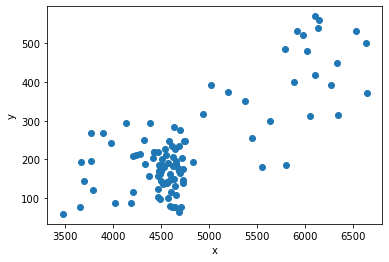

In [ ]:
plt.scatter(data.x, data.y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
with pymc3.Model() as model:
    # 事前分布をN(0, 100)の正規分布で設定
    beta1 = pymc3.Normal('beta1', mu=0, sd=100)
    beta2 = pymc3.Normal('beta2', mu=0, sd=100)
    
    # 線形予測子θをβ1+β2xで設定
    theta = beta1 + beta2*data['x'].values
    
    # logリンク関数(log(μ)=θ⇔μ=exp(θ))を設定し、ポアソン分布で推定する
    y = pymc3.Poisson('y', mu=np.exp(theta), observed=data['y'].values)

Multiprocess sampling (3 chains in 2 jobs)
NUTS: [beta2, beta1]


Sampling 3 chains for 100 tune and 5_000 draw iterations (300 + 15_000 draws total) took 552 seconds.
The acceptance probability does not match the target. It is 0.9366798777965967, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9188277070087639, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9139094969200794, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effec

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta1,1.377,0.985,0.016,3.192,0.397,0.296,6.0,6.0,7.0,24.0,2.14
beta2,0.016,0.002,0.013,0.019,0.001,0.001,6.0,6.0,7.0,24.0,2.14


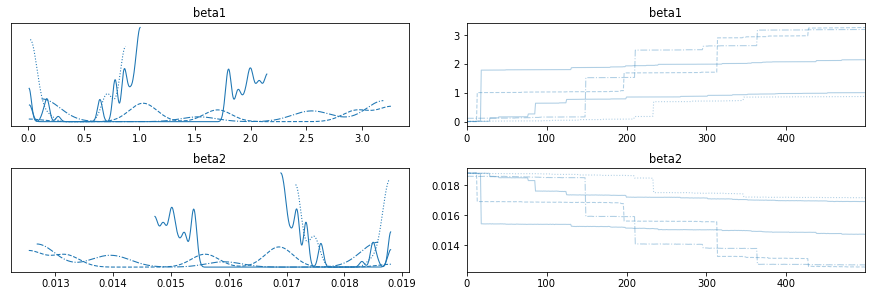

In [ ]:
#デフォルトでサンプリング
with model:
    # 101個目から3個置きでサンプルを取得するチェインを3つ
    trace = pymc3.sample(5000, step=pymc3.NUTS(), tune=100, chains=3, random_seed=0)[::3]
    
_ = pymc3.traceplot(trace_NUTS)
pymc3.summary(trace_NUTS)